## GPU 드라이버 설치 (삼성 노트북 Always9 950XBE)
- NVIDIA MX150 Device Driver Update
- CUDA 10.1 설치
- CUDNN 7.6.3 for CUDA 10.1 다운로드

## Tensorflow-gpu 설치
- conda update conda
- conda update anaconda
- conda update python
- conda update --all
- conda info --envs
- conda create --name tf1.14-gpu
- conda activate tf1.14-gpu
- pip install tensorflow-gpu

In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 368974020926590211
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1426918195
locality {
  bus_id: 1
  links {
  }
}
incarnation: 15224308647238731560
physical_device_desc: "device: 0, name: GeForce MX150, pci bus id: 0000:3a:00.0, compute capability: 6.1"
]


In [2]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
%matplotlib inline

Using TensorFlow backend.


In [3]:
# seed 값 설정
seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

In [4]:
# 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0],784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

In [ ]:
import keras.backend.tensorflow_backend as K
with K.tf.device('/CPU:0'):
    model = Sequential()
    model.add(Dense(512, input_dim=28*28, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.summary()
    
    model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop', metrics=['accuracy'])
    history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), 
                        epochs=10, batch_size=200, verbose=1)

W0830 15:08:21.957997  2988 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0830 15:08:21.959485  2988 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0830 15:08:21.962957  2988 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0830 15:08:22.033884  2988 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0830 15:08:22.055256  2988 deprecation_wrapper.py:119] From C:\ProgramData\Anac

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 570,602
Trainable params: 570,602
Non-trainable params: 0
_________________________________________________________________


In [18]:
# 테스트 정확도 출력 
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

10000/10000 [==============================] - 0s 36us/step

 Test Accuracy: 0.9818


In [19]:
# 테스트셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

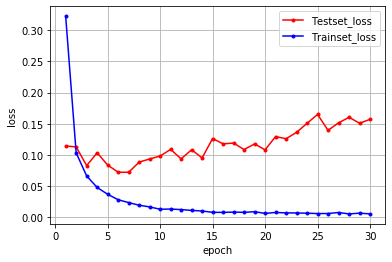

In [20]:
# 그래프로 표현
x_len = np.arange(1, len(y_loss)+1)
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()